In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Module_241021 import load_data_w_glob

In [34]:
# load time diff data
diff_tau_all = pd.read_csv("time_delay_diff_241021.csv")

# load + pickout velocity data
PSA_all_df = load_data_w_glob(directory_path="PSA_data", file_pattern="*241021.csv")
velocity_all = PSA_all_df[["network", "parameter", "rel change", "condition 1", "condition 2", "velocity"]]

# load statistical results
tau_stats = pd.read_csv("distribution stats/MW_results_velocity_GNE_GN_241025.csv")
v_stats = pd.read_csv("distribution stats/wilcoxon_test_GNEvGN_241021.csv")

In [38]:
tau_stats

,df compare,df ref,parameter,rel change,p-value,reject 0.05,reject 0.01,reject 0.001
0,GNE,GN,KEG,1.25,1.618209e-09,True,True,True
1,GNE,GN,KEG,3.00,1.056810e-06,True,True,True
2,GNE,GN,KEG,2.00,1.519043e-10,True,True,True
3,GNE,GN,KEG,4.00,2.720050e-05,True,True,True
4,GNE,GN,KEG,1.00,2.171210e-08,True,True,True
...,...,...,...,...,...,...,...,...
95,GNE,GN,alphaGN,5.00,8.993056e-01,False,False,False
96,GNE,GN,alphaGN,0.25,9.768292e-01,False,False,False
97,GNE,GN,alphaGN,0.75,6.768587e-10,True,True,True
98,GNE,GN,alphaGN,0.50,1.000000e+00,False,False,False


In [50]:
stat0 = tau_stats["parameter"].isin(['KEG', 'KaaNG', 'KmiNG', 'KmiEN','KNEG', 'alphaGN', "alphaEO"])
stat1 = tau_stats["reject 0.05"] == True

tau_GNE = tau_stats[stat0 & stat1][["parameter", "rel change"]]

tau_GNE

,parameter,rel change
0,KEG,1.25
1,KEG,3.00
2,KEG,2.00
3,KEG,4.00
4,KEG,1.00
5,KEG,5.00
7,KEG,0.75
10,alphaEO,1.25
11,alphaEO,3.00
12,alphaEO,2.00


In [4]:
import pandas as pd

# Example DataFrames
df_a = pd.DataFrame({
    'parameter': ['param1', 'param1', 'param1', 'param2', 'param2', 'param2'],
    'rel change': [0.1, 0.2, 0.3, 0.1, 0.2, 0.3],
    #'other_info': ['info1', 'info2', 'info3', 'info4', 'info5', 'info6']  # Additional column in df_a
})

df_b = pd.DataFrame({
    'parameter': ['param1', 'param1', 'param1', 'param2', 'param2', 'param2'],
    'rel change': [0.1, 0.2, 0.3, 0.1, 0.2, 0.3],
    'condition 1': [1.0, 1.1, 1.2, 2.0, 2.1, 2.2],
    'condition 2': [2.0, 2.1, 2.2, 3.0, 3.1, 3.2]
})

# Create a composite key in both DataFrames
df_a['composite_key'] = df_a['parameter'].astype(str) + "_" + df_a['rel change'].astype(str)
df_b['composite_key'] = df_b['parameter'].astype(str) + "_" + df_b['rel change'].astype(str)

# Merge on the composite key
merged_df = pd.merge(df_a, df_b, on='composite_key', suffixes=('_a', '_b'))

# After merge, check column names
print("Columns after merge:", merged_df.columns)

# Drop the composite key and rename columns
merged_df = merged_df.drop(columns=['composite_key'])

# Rename suffixed columns to desired names if necessary
merged_df = merged_df.rename(columns={
    'parameter_a': 'parameter',
    'rel change_a': 'rel change'
})

# Reorder columns
desired_order = ['parameter', 'rel change', 'condition 1', 'condition 2']
merged_df = merged_df[desired_order]

print(merged_df)


Columns after merge: Index(['parameter_a', 'rel change_a', 'composite_key', 'parameter_b',
       'rel change_b', 'condition 1', 'condition 2'],
      dtype='object')
  parameter  rel change  condition 1  condition 2
0    param1         0.1          1.0          2.0
1    param1         0.2          1.1          2.1
2    param1         0.3          1.2          2.2
3    param2         0.1          2.0          3.0
4    param2         0.2          2.1          3.1
5    param2         0.3          2.2          3.2


In [31]:
mask0 = diff_tau_all["two_networks"]=="GNEvGN"
mask1 = diff_tau_all["condition 1"]==True
mask2 = diff_tau_all["condition 2"]==True


tau_df=diff_tau_all[mask0&mask1&mask2][["time diff", "parameter", "rel change"]]

maskA = velocity_all["network"].isin(["GN", "GNE"])
maskB = velocity_all["condition 1"]==True
maskC = velocity_all["condition 2"]==True

v_df = velocity_all[maskA&maskB&maskC]["velocity"]

In [32]:
print(len(tau_df)/1127, len(v_df)/1127)

82.0 166.0


In [33]:
tau_df

,time diff,parameter,rel change
4508,0.172607,alphaGN,1.0
4509,0.349412,alphaGN,1.0
4510,0.551374,alphaGN,1.0
4511,1.114241,alphaGN,1.0
4512,1.493655,alphaGN,1.0
...,...,...,...
112695,1.673638,KmaOE,5.0
112696,1.734279,KmaOE,5.0
112697,1.812309,KmaOE,5.0
112698,1.948431,KmaOE,5.0


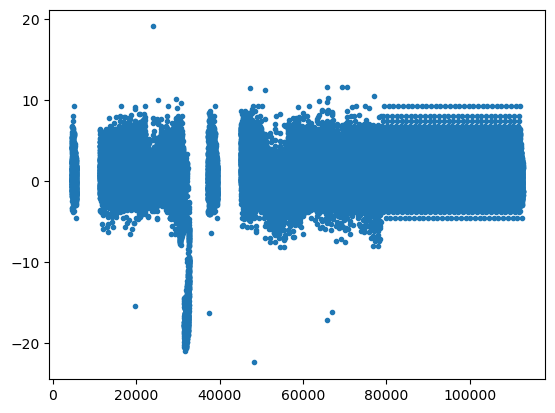

In [13]:
plt.plot(tau_df, ,".")